In [1]:
import torch
import torch.nn.functional as F
from torch import nn
from torchvision.io import read_image
from torch.utils.data import Dataset

### Customizing the data to fit PyTorch DataLoader

In [2]:
batch_size = 4

In [6]:
import pandas as pd

data = pd.read_csv('letter.data', sep="\t", header=None)
test = torch.tensor(list(data.iloc[0, 6:-1].astype('float')))
print(torch.reshape(test, (16, 8)))

test2 = data[1]
#print(list(test2))

le = preprocessing.LabelEncoder()
test3 = le.fit_transform(test2)
#print(list(test3))

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 0.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [7]:
test = data[data[5]==9]
val_list = [7, 8]
val = data[data[5].isin(val_list)]
train = data[data[5] < 7]

In [8]:
data[data[5]==7]

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
9,10,o,11,2,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
10,11,m,12,2,2,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
11,12,m,13,2,3,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
12,13,a,14,2,4,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
13,14,n,15,2,5,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52063,52064,n,52065,6871,10,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
52064,52065,t,52066,6871,11,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
52065,52066,i,52067,6871,12,7,0,0,1,1,...,0,0,0,0,0,1,0,0,0,NaN
52066,52067,a,52068,6871,13,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [9]:
train.to_csv('train.csv', index=False, header=False)
test.to_csv('test.csv', index=False, header=False)
val.to_csv('val.csv', index=False, header=False)

In [10]:
data[1].iloc[1]

'm'

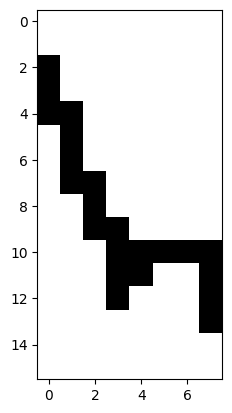

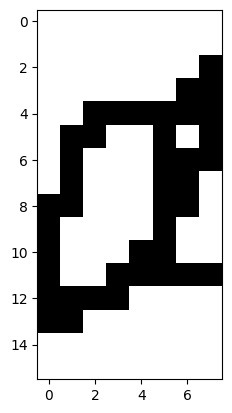

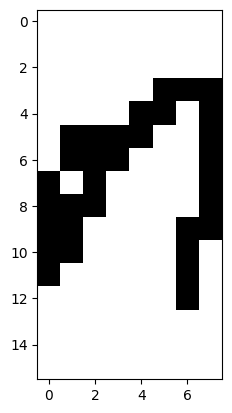

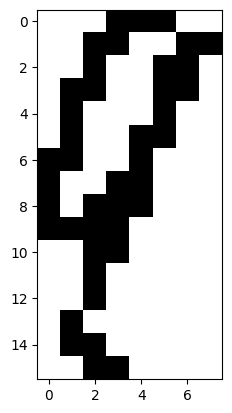

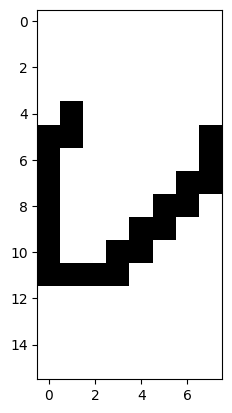

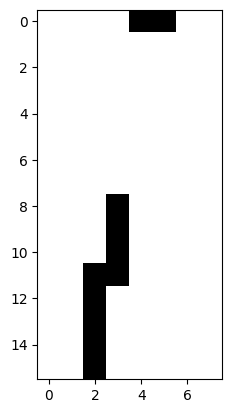

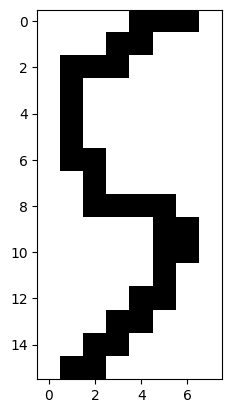

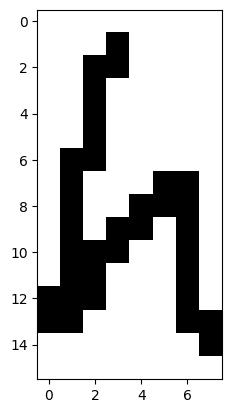

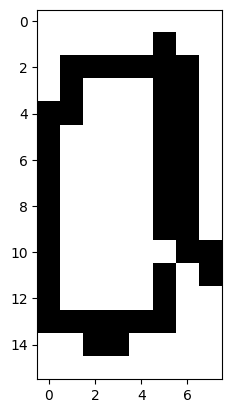

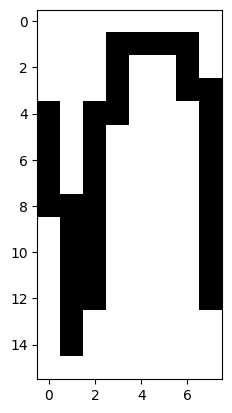

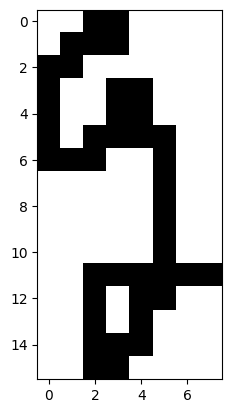

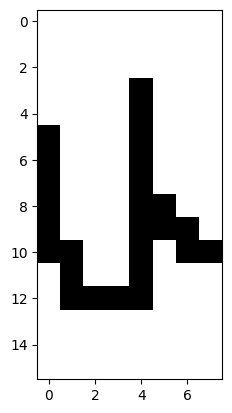

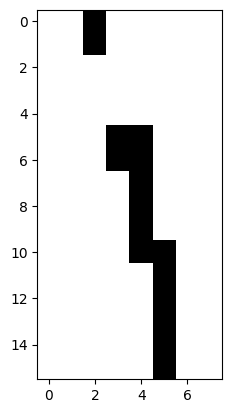

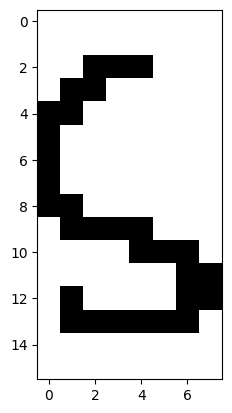

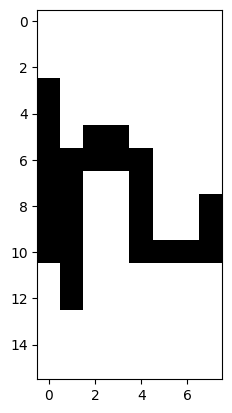

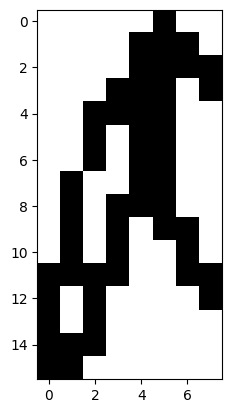

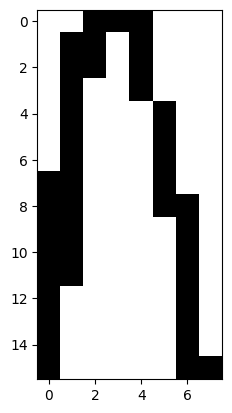

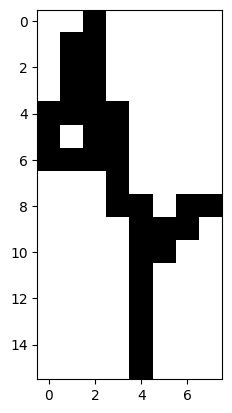

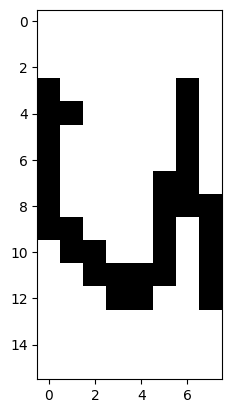

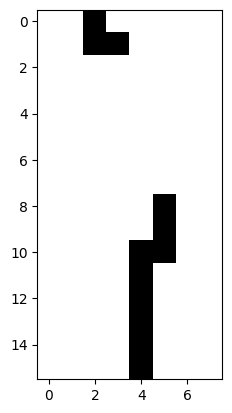

In [11]:
import matplotlib.pyplot as plt

for tests in range(10000, 10020):
    image = list(data.iloc[tests])

    image = image[6:]

    X = []
    for i in range(16):
        X.append([])
        for j in range(8):
            if(image[i*8+j] != None):
                X[i].append(image[(i*8)+j])

    im = plt.imshow(X, cmap='Greys')
    plt.show()

In [121]:
from sklearn import preprocessing
import torch

#Another preprocessing step required

class CustomImageDataset(Dataset):
    le = preprocessing.LabelEncoder()
    
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.img_file = pd.read_csv(annotations_file, sep=",", header=None) #Customized for .data file
        self.img_labels = self.img_file[1]
        self.img_labels = list(le.fit_transform(list(self.img_labels)))
        #self.img_dir = img_dir #Can be redacted
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        #####################################################################
        #                                                                   #
        #img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])#
        #image = read_image(img_path)                                       #
        #                                                                   #
        ###### No longer required as images are in .data file ###############
        image = torch.tensor(list(self.img_file.iloc[idx, 6:-1].astype('float')))
        image = torch.reshape(image, (1, 16, 8))
        label = self.img_labels
        label = torch.as_tensor(label)[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [122]:
from torch.utils.data import DataLoader

training_data = CustomImageDataset('train.csv')
test_data = CustomImageDataset('test.csv')
validation_data = CustomImageDataset('val.csv')

training_loader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True, drop_last=True)
testing_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=4, shuffle=True, drop_last=True)

Feature batch shape: torch.Size([4, 1, 16, 8])
Labels batch shape: torch.Size([4])


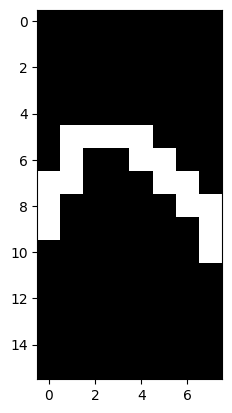

Label: 13


In [123]:
train_features, train_labels = next(iter(training_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Training Model

In [38]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [153]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, padding=1)
        
        self.fc1 = torch.nn.Linear(2048, 512) #Edited for model 2
        self.batch_norm = torch.nn.BatchNorm1d(512)
        self.fc2 = torch.nn.Linear(512, 26) #Edited for model 2
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.relu(self.conv2(x))
        #print('x_shape:', x.shape)
        x = x.view(-1, self.num_flat_features(x))
        x = F.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.batch_norm(x)
        x = F.relu(self.fc2(x)) #Added for model 2
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
model = Model().to(device)

In [154]:
print(model)

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=26, bias=True)
)


### Testing the model

In [155]:
test5 = torch.rand(5, 1, 16, 8, device=device)
model(test5)

tensor([[0.3044, 0.3488, 0.0000, 0.1053, 0.2115, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2890, 0.1358, 0.0849, 0.1942, 0.1544, 0.2977, 0.1573, 0.0000,
         0.0563, 0.0000, 0.0000, 0.0000, 0.0000, 0.3122, 0.0000, 0.9107],
        [0.1225, 0.3062, 0.0174, 0.0116, 0.1000, 0.1431, 0.1966, 0.8669, 0.2769,
         0.6649, 0.0655, 0.0000, 0.0000, 0.0000, 0.6912, 0.0000, 0.5895, 0.7052,
         0.0000, 0.0000, 0.0778, 1.3012, 0.0000, 0.2084, 0.3918, 0.0000],
        [0.0000, 0.0649, 1.1189, 0.0965, 0.6188, 0.1973, 0.0000, 0.9881, 0.1051,
         0.7002, 0.0000, 0.5557, 0.0000, 0.6222, 0.6205, 0.1302, 0.0000, 0.0000,
         0.5945, 0.3034, 0.7764, 0.0000, 0.0000, 0.0000, 0.0000, 0.5401],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6441, 0.6438, 0.0000, 0.0000,
         0.2430, 0.0666, 0.0000, 1.1816, 0.0000, 0.0000, 0.0000, 0.0000, 0.3813,
         0.5981, 0.0800, 0.0000, 0.0000, 0.3035, 0.0953, 0.7992, 0.0000],
        [0.1939, 0.0000, 0.3936, 0.6276, 0.0017, 0.0000,

In [156]:
test5 = torch.rand(5, 1, 16, 8, device=device)
log = model(test5)
pred_probab = nn.Softmax(dim=1)(log)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([ 0, 22, 21, 16, 12])


### Loss function

In [157]:
loss_fn = torch.nn.CrossEntropyLoss()

#Just an example to check the calculation from cross entropy loss
#################################################################
dummy_outputs = torch.rand(4, 10)

dummy_labels = torch.tensor([1,5,3,7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))
#################################################################

tensor([[0.2123, 0.2565, 0.3248, 0.7691, 0.1475, 0.2774, 0.7879, 0.0717, 0.0901,
         0.6179],
        [0.1435, 0.8336, 0.8057, 0.9056, 0.2404, 0.3883, 0.7007, 0.7155, 0.5537,
         0.8340],
        [0.1648, 0.1966, 0.4013, 0.6418, 0.0276, 0.0149, 0.0990, 0.2508, 0.4559,
         0.5843],
        [0.8468, 0.5361, 0.1835, 0.4505, 0.2196, 0.3973, 0.8531, 0.3239, 0.8429,
         0.9676]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.3850436210632324


### Optimizer

In [158]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Full Implementation (https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)

In [22]:
print(len(training_loader))

9077


In [23]:
len(training_loader.dataset)

36309

# Deactivate

In [41]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def validation_loop(dataloader, model, loss_fn):
    
            
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [18]:
learning_rate = 0.002

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, model, loss_fn, optimizer)
    test_loop(testing_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.536465  [    4/36309]
loss: 0.157256  [  404/36309]
loss: 0.362432  [  804/36309]
loss: 0.897912  [ 1204/36309]
loss: 0.102321  [ 1604/36309]
loss: 1.184547  [ 2004/36309]
loss: 0.706657  [ 2404/36309]
loss: 1.472825  [ 2804/36309]
loss: 1.299347  [ 3204/36309]
loss: 1.050482  [ 3604/36309]
loss: 1.607230  [ 4004/36309]
loss: 0.788876  [ 4404/36309]
loss: 0.394077  [ 4804/36309]
loss: 0.820280  [ 5204/36309]
loss: 1.436058  [ 5604/36309]
loss: 0.395380  [ 6004/36309]
loss: 0.581834  [ 6404/36309]
loss: 0.448915  [ 6804/36309]
loss: 1.141622  [ 7204/36309]
loss: 0.244426  [ 7604/36309]
loss: 0.638147  [ 8004/36309]
loss: 2.811314  [ 8404/36309]
loss: 1.195581  [ 8804/36309]
loss: 2.151495  [ 9204/36309]
loss: 1.509534  [ 9604/36309]
loss: 0.355637  [10004/36309]
loss: 0.549079  [10404/36309]
loss: 1.654608  [10804/36309]
loss: 1.174178  [11204/36309]
loss: 2.501193  [11604/36309]
loss: 0.203651  [12004/36309]
loss: 1.552639  [12404/36309]


loss: 0.380714  [33604/36309]
loss: 2.241446  [34004/36309]
loss: 0.685241  [34404/36309]
loss: 0.275216  [34804/36309]
loss: 0.383212  [35204/36309]
loss: 1.280445  [35604/36309]
loss: 2.174157  [36004/36309]
Test Error: 
 Accuracy: 81.1%, Avg loss: 0.666422 

Epoch 4
-------------------------------
loss: 2.297645  [    4/36309]
loss: 2.139495  [  404/36309]
loss: 0.193729  [  804/36309]
loss: 0.145982  [ 1204/36309]
loss: 0.075255  [ 1604/36309]
loss: 0.474250  [ 2004/36309]
loss: 1.751922  [ 2404/36309]
loss: 0.143930  [ 2804/36309]
loss: 1.303412  [ 3204/36309]
loss: 0.088319  [ 3604/36309]
loss: 1.911556  [ 4004/36309]
loss: 0.449457  [ 4404/36309]
loss: 0.947484  [ 4804/36309]
loss: 1.253420  [ 5204/36309]
loss: 0.573160  [ 5604/36309]
loss: 1.085067  [ 6004/36309]
loss: 0.676294  [ 6404/36309]
loss: 0.333907  [ 6804/36309]
loss: 0.102483  [ 7204/36309]
loss: 0.538119  [ 7604/36309]
loss: 0.174744  [ 8004/36309]
loss: 0.160240  [ 8404/36309]
loss: 0.100822  [ 8804/36309]
loss: 0.

loss: 0.060551  [30004/36309]
loss: 0.008964  [30404/36309]
loss: 0.175163  [30804/36309]
loss: 0.892608  [31204/36309]
loss: 0.531731  [31604/36309]
loss: 2.120584  [32004/36309]
loss: 0.159748  [32404/36309]
loss: 3.437510  [32804/36309]
loss: 0.426585  [33204/36309]
loss: 0.032216  [33604/36309]
loss: 0.036012  [34004/36309]
loss: 1.075087  [34404/36309]
loss: 1.052477  [34804/36309]
loss: 0.441463  [35204/36309]
loss: 1.874993  [35604/36309]
loss: 0.524499  [36004/36309]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.546720 

Epoch 7
-------------------------------
loss: 0.118445  [    4/36309]
loss: 0.429289  [  404/36309]
loss: 0.553313  [  804/36309]
loss: 1.410858  [ 1204/36309]
loss: 1.034976  [ 1604/36309]
loss: 0.743228  [ 2004/36309]
loss: 0.186012  [ 2404/36309]
loss: 1.440225  [ 2804/36309]
loss: 0.225403  [ 3204/36309]
loss: 2.049175  [ 3604/36309]
loss: 0.406252  [ 4004/36309]
loss: 0.099642  [ 4404/36309]
loss: 0.037781  [ 4804/36309]
loss: 0.011444  [ 5204/36309]
loss: 0.

loss: 0.325917  [26404/36309]
loss: 0.020734  [26804/36309]
loss: 0.079337  [27204/36309]
loss: 1.403017  [27604/36309]
loss: 1.072142  [28004/36309]
loss: 0.016631  [28404/36309]
loss: 0.073036  [28804/36309]
loss: 0.008841  [29204/36309]
loss: 0.325980  [29604/36309]
loss: 0.066942  [30004/36309]
loss: 0.880987  [30404/36309]
loss: 1.006251  [30804/36309]
loss: 0.131955  [31204/36309]
loss: 0.035624  [31604/36309]
loss: 0.071862  [32004/36309]
loss: 1.372985  [32404/36309]
loss: 0.368548  [32804/36309]
loss: 0.602802  [33204/36309]
loss: 1.217362  [33604/36309]
loss: 0.077577  [34004/36309]
loss: 0.167329  [34404/36309]
loss: 2.406399  [34804/36309]
loss: 0.092512  [35204/36309]
loss: 0.930925  [35604/36309]
loss: 0.104261  [36004/36309]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.525279 

Epoch 10
-------------------------------
loss: 0.277771  [    4/36309]
loss: 0.747002  [  404/36309]
loss: 0.748755  [  804/36309]
loss: 0.095712  [ 1204/36309]
loss: 0.374251  [ 1604/36309]
loss: 2

# Activate

In [159]:
#Another training function
################################################
#                                              #
# Only use this if the above code was not used #
#                                              #
################################################

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [ ]:
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/letter_recognition_new_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 50

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in tqdm(enumerate(validation_loader), total=len(validation_loader)):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'new_model_{}_{}.pth'.format(timestamp, epoch_number)
        torch.save(model, model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 2.5839830877184866
  batch 2000 loss: 1.7871529823243617
  batch 3000 loss: 1.4531636323928834
  batch 4000 loss: 1.3021278928667306
  batch 5000 loss: 1.2031828420236708
  batch 6000 loss: 1.111134022027254
  batch 7000 loss: 1.0554542797729374
  batch 8000 loss: 1.0195580135565252
  batch 9000 loss: 0.9499117729663848


100%|██████████████████████████████████████████████████████████████████████████████| 2675/2675 [00:37<00:00, 70.64it/s]


LOSS train 0.9499117729663848 valid 0.6578373908996582
EPOCH 2:
  batch 1000 loss: 0.8834943842291832
  batch 2000 loss: 0.8647885757554322
  batch 3000 loss: 0.8492852269094437
  batch 4000 loss: 0.8111547605246305
  batch 5000 loss: 0.8168802236523479
  batch 6000 loss: 0.7791118826987222
  batch 7000 loss: 0.7930316044359934
  batch 8000 loss: 0.7758860235149041
  batch 9000 loss: 0.7661579646039754


 76%|██████████████████████████████████████████████████████████▉                   | 2023/2675 [00:28<00:09, 68.97it/s]

Predicted class: tensor([10])


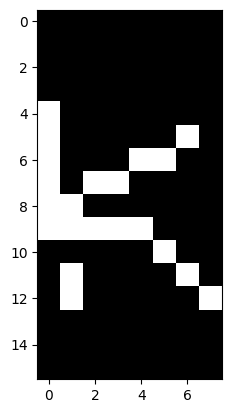

In [73]:
from torchvision.io import read_image
from torchvision.io import ImageReadMode

inp = read_image("k.jpg", mode = ImageReadMode.GRAY)
inp = inp.to(torch.float32).reshape((1,1,16,8))

inp[inp<=40.] = 1
inp[inp>40.] = 0


img = inp.squeeze()
plt.imshow(img, cmap="gray")

pred = model(inp)
pred_probab = nn.Softmax(dim=1)(pred)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

In [72]:
model = torch.load('model_20240602_210951_30.pth')

## Module for defisheyeing the image using defisheye

In [49]:
from defisheye import Defisheye

In [75]:
dtype = 'linear'
format = 'fullframe'
fov = 180
pfov = 90

img = "fisheye_e.jpg"
#img_out = f"defisheyed_e{dtype}_{format}_{pfov}_{fov}.jpg"

obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)

# To save image locally 
#obj.convert(outfile=img_out)

# To use the converted image in memory

new_image = obj.convert()

## Resize scanned image to fit input size

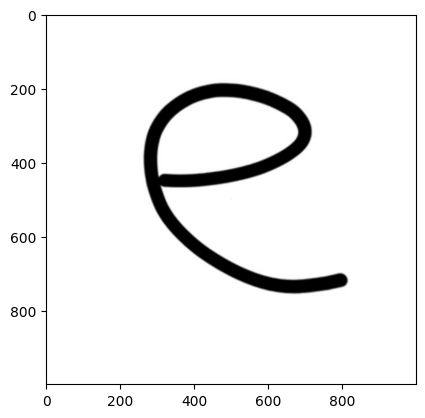

In [76]:
import matplotlib.pyplot as plt

img = plt.imshow(new_image)
plt.show(img)

In [77]:
import cv2
import numpy as np

#img = cv2.imread(new_image)
res = cv2.resize(new_image, dsize=(8, 16), interpolation=cv2.INTER_AREA)

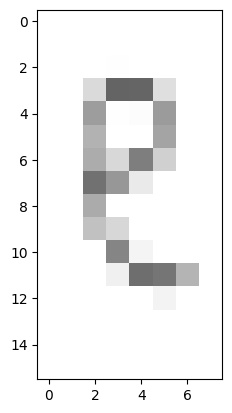

In [78]:
img = plt.imshow(res)
plt.show(img)

In [79]:
import cv2

gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY) 

[[255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 254 255 255 255 255]
 [255 255 218 100 101 223 255 255]
 [255 255 157 254 252 155 255 255]
 [255 255 178 255 255 164 255 255]
 [255 255 172 216 126 208 255 255]
 [255 255 113 151 234 255 255 255]
 [255 255 171 255 255 255 255 255]
 [255 255 193 215 255 255 255 255]
 [255 255 255 133 244 255 255 255]
 [255 255 255 240 110 117 180 255]
 [255 255 255 255 255 243 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


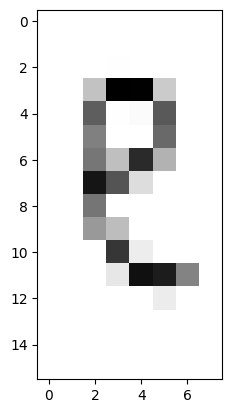

In [80]:
plt.imshow(gray_image, cmap="gray")
print(gray_image)

In [81]:
import torch

inp = torch.tensor(gray_image)

inp = inp.to(torch.float32).reshape((1,1,16,8))

tensor([[255., 255., 255., 255., 255., 255., 255., 255.],
        [255., 255., 255., 255., 255., 255., 255., 255.],
        [255., 255., 255., 254., 255., 255., 255., 255.],
        [255., 255., 218., 100., 101., 223., 255., 255.],
        [255., 255., 157., 254., 252., 155., 255., 255.],
        [255., 255., 178., 255., 255., 164., 255., 255.],
        [255., 255., 172., 216., 126., 208., 255., 255.],
        [255., 255., 113., 151., 234., 255., 255., 255.],
        [255., 255., 171., 255., 255., 255., 255., 255.],
        [255., 255., 193., 215., 255., 255., 255., 255.],
        [255., 255., 255., 133., 244., 255., 255., 255.],
        [255., 255., 255., 240., 110., 117., 180., 255.],
        [255., 255., 255., 255., 255., 243., 255., 255.],
        [255., 255., 255., 255., 255., 255., 255., 255.],
        [255., 255., 255., 255., 255., 255., 255., 255.],
        [255., 255., 255., 255., 255., 255., 255., 255.]])


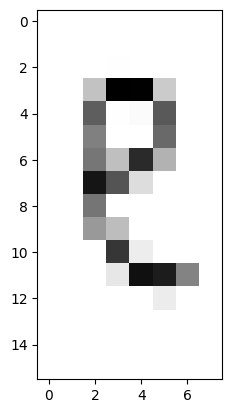

In [82]:
img = inp.squeeze()
plt.imshow(img, cmap="gray")

print(img)

In [83]:
inp[inp<255.] = 1
inp[inp==255.] = 0

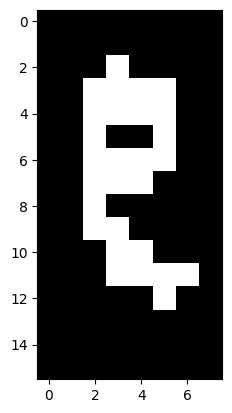

In [84]:
img = inp.squeeze()
plt.imshow(img, cmap="gray")

# Testing

In [60]:
import torch
from torchvision.io import read_image
from torchvision.io import ImageReadMode
from sklearn import preprocessing
import torch.nn.functional as F
from torch import nn
from torchvision.io import read_image
from torch.utils.data import Dataset
import pandas as pd
from torch.utils.data import DataLoader

In [61]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [62]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.fc1 = nn.Linear(512, 26)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        #print('x_shape:', x.shape)
        x = x.view(-1, self.num_flat_features(x))
        x = F.dropout(x)
        x = F.relu(self.fc1(x))
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
model = Model().to(device)

In [86]:
pred = model(inp)
pred_probab = nn.Softmax(dim=1)(pred)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {chr(y_pred[0]+97)}")

Predicted class: p


In [66]:
y_pred[0]

tensor(329)

# Testing

In [150]:
from tqdm import tqdm
from glob import glob

files = glob('model_20240602_210951_*')

num_corr = 0

with torch.no_grad():
    for file in files:
        model = torch.load(file)
        num_corr = 0
        for i, tdata in tqdm(enumerate(testing_loader), total=len(testing_loader)):
            tinputs, tlabels = tdata
            toutputs = model(tinputs)
            t_prob = nn.Softmax(dim=1)(toutputs)
            t_pred = t_prob.argmax(1)
            num_corr += sum(tlabels==t_pred)

        accuracy = num_corr/len(testing_loader.dataset)
        print(file+" Accuracy = ", accuracy.item()*100)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x2048 and 512x512)

In [118]:
len(testing_loader.dataset)

5142